In [40]:
import pennylane as qml
from pennylane import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

In [41]:
#load the file
from importlib.metadata import requires


data = pd.read_csv('insurance_data.csv')
# data.head()
X=np.array(data['age'],requires_grad=False)
Y=np.array(data['bought_insurance'],requires_grad=False)

In [42]:
#normlize the values
X=(X-X.min())/(X.max()-X.min())
Y=(Y-Y.min())/(Y.max()-Y.min())

In [43]:
dev=qml.device("default.qubit",wires=1)

In [44]:
@qml.qnode(dev)
def circuit(x,weights):
    qml.RX(x*np.pi,wires=0)
    qml.RY(weights[0],wires=0)
    return qml.expval(qml.PauliZ(0))

In [45]:
def Quantum_modal(x,weights):
    z=circuit(x,weights)
    return (z+1)/2

In [46]:
def cost(weights):
    predictions = np.array([Quantum_modal(x, weights) for x in X])
    predictions = np.clip(predictions, 1e-6, 1 - 1e-6)
    return -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))


In [47]:
weights = np.array([0.1], requires_grad=True)
opt = qml.GradientDescentOptimizer(0.4)
for epoch in range(100):
    weights = opt.step(cost, weights)


In [48]:
preds = np.array([Quantum_modal(x, weights) for x in X])
pred_labels = [1 if p > 0.5 else 0 for p in preds]

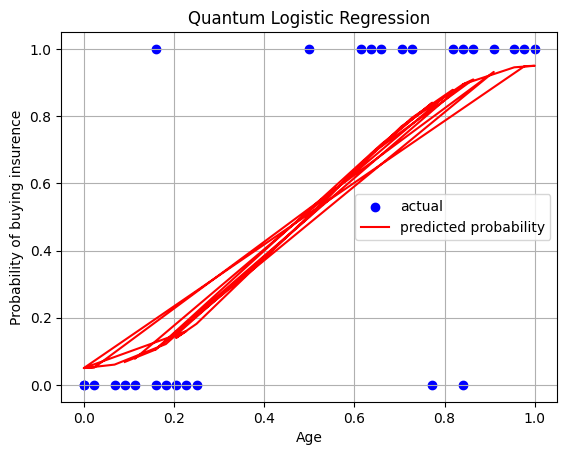

In [51]:
plt.scatter(X,Y,label="actual",color="Blue")
plt.plot(X,preds,color="red",label="predicted probability")
plt.title("Quantum Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Probability of buying insurence")
plt.legend()
plt.grid(True)
plt.show()